In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
real = pd.read_csv('datasets/kag_risk_factors_cervical_cancer.csv')
#print(real.columns)
real_age = real['Age'].sort_values()
real_age.reset_index(drop=True, inplace=True)
real_age_cummsum = real_age.cumsum()

In [73]:
fake = pd.read_csv('synData/synData_ctgan.csv')
fake_age = fake['Age'].sort_values()
fake_age.reset_index(drop=True, inplace=True)
fake_age_cummsum = fake_age.cumsum()

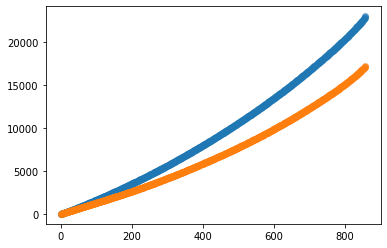

In [74]:
x = [i for i in range(len(real_age_cummsum))]

plt.scatter(x, real_age_cummsum, alpha=0.5)
plt.scatter(x, fake_age_cummsum, alpha=0.5)
plt.show()

In [75]:
#print(real.columns)
real_smokes = real['Smokes'].sort_values()
real_smokes.reset_index(drop=True, inplace=True)
real_smokes_cummsum = real_smokes.cumsum()
print(real_smokes.dtypes)

object


In [76]:
fake_smokes = fake['Smokes'].sort_values()
fake_smokes.reset_index(drop=True, inplace=True)
fake_smokes_cummsum = fake_smokes.cumsum()

In [77]:
# x = [i for i in range(len(real_age_cummsum))]

# plt.scatter(x, real_age_cummsum, alpha=0.5)
# plt.scatter(x, fake_age_cummsum, alpha=0.5)
# plt.show()

In [84]:
def cumsum(real, fake, cols=None):
    if cols is None:
        cols = list(real.columns)
    else:
        cols = cols


    for col in cols:
        print(real[col].dtypes)
        if not (real[col].dtypes == np.int64 or real[col].dtypes == np.float16):
            print(f'The type of {col} isn\'t int or float')
            continue

        # calculating cummulative sums
        real_ = real[col].sort_values()
        real_.reset_index(drop=True, inplace=True)
        real_cummsum = real_.cumsum()

        fake_ = fake[col].sort_values()
        fake_.reset_index(drop=True, inplace=True)
        fake_cummsum = fake_.cumsum()

        # plotting
        x = [i for i in range(len(fake_))]

        plt.figure(figsize=(6, 6))
        plt.title(col)
        plt.scatter(x, real_cummsum, alpha=0.5)
        plt.scatter(x, fake_cummsum, alpha=0.5)
        plt.legend(labels=[f'Real {col}', f'Fake {col}'])
        plt.show()


int64


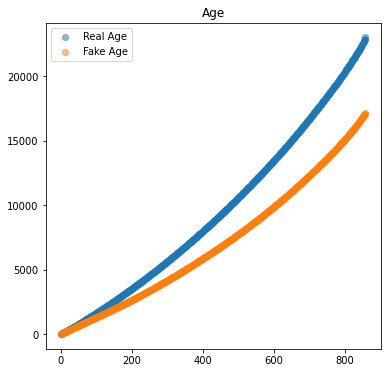

object
The type of Number of sexual partners isn't int or float
object
The type of First sexual intercourse isn't int or float
object
The type of Num of pregnancies isn't int or float
object
The type of Smokes isn't int or float
object
The type of Smokes (years) isn't int or float
object
The type of Smokes (packs/year) isn't int or float
object
The type of Hormonal Contraceptives isn't int or float
object
The type of Hormonal Contraceptives (years) isn't int or float
object
The type of IUD isn't int or float
object
The type of IUD (years) isn't int or float
object
The type of STDs isn't int or float
object
The type of STDs (number) isn't int or float
object
The type of STDs:condylomatosis isn't int or float
object
The type of STDs:cervical condylomatosis isn't int or float
object
The type of STDs:vaginal condylomatosis isn't int or float
object
The type of STDs:vulvo-perineal condylomatosis isn't int or float
object
The type of STDs:syphilis isn't int or float
object
The type of STDs:p

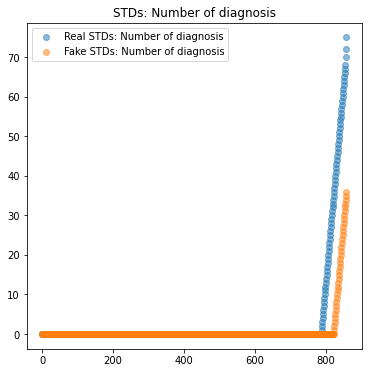

object
The type of STDs: Time since first diagnosis isn't int or float
object
The type of STDs: Time since last diagnosis isn't int or float
int64


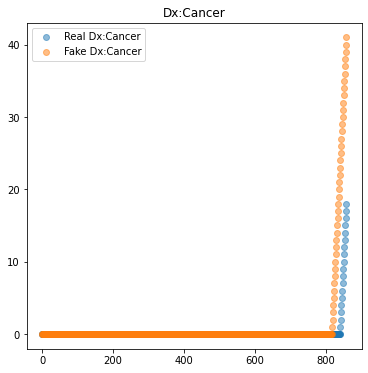

int64


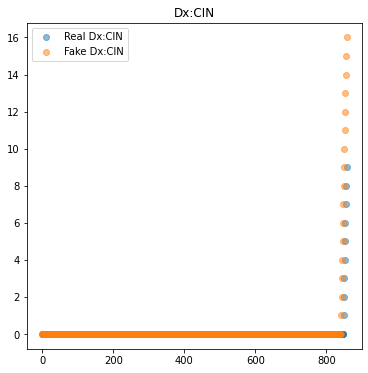

int64


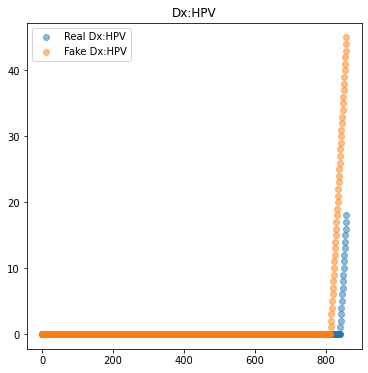

int64


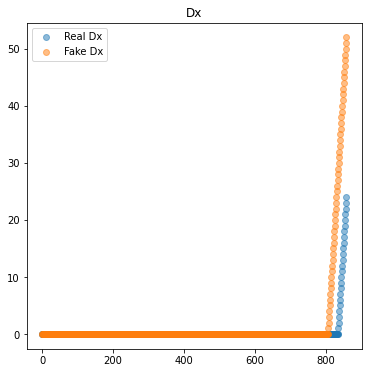

int64


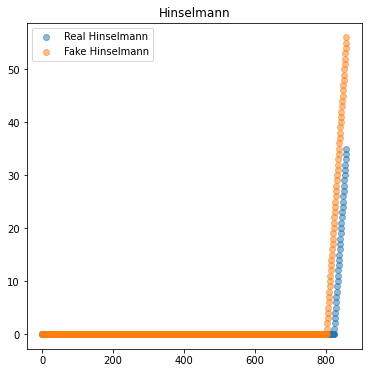

int64


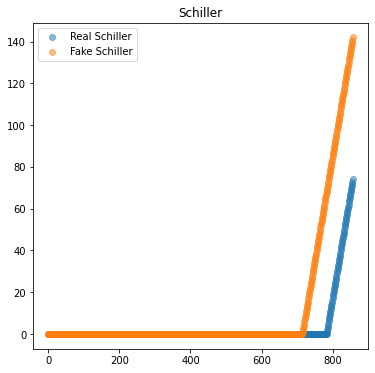

int64


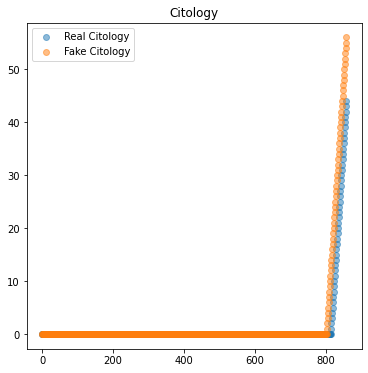

int64


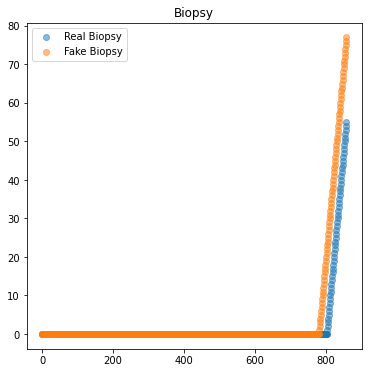

In [85]:
cumsum(real, fake)